### Import libraries

In [1]:
import os

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import cv2 

### Create Dataframe

In [2]:
def create_df(type:str,path:str)->pd.DataFrame:
    columns = ['type','shape','pixel','path']
    df = pd.DataFrame(columns=columns)
    for index,img in enumerate(os.listdir(path)):
        img_path = f'{path}/{img}'
        img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        df.loc[index]=[type,img.shape,img,img_path]
    return df

In [3]:
glioma_df=create_df(type='glioma',path='./clean_datasets/glioma')
meningioma_df=create_df(type='meningioma',path='./clean_datasets/meningioma')
pituitary_df=create_df(type='pituitary',path='./clean_datasets/pituitary')
normal_df=create_df(type='normal',path='./clean_datasets/normal')


### Basic Information

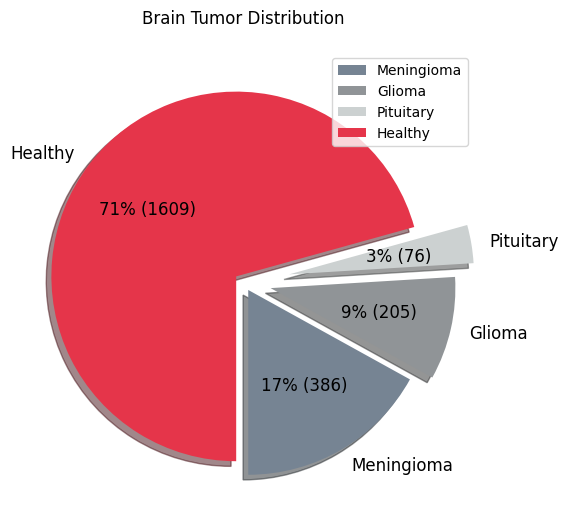

In [14]:
meningioma_count=meningioma_df['type'].size
glioma_count=glioma_df['type'].size
pituitary_count=pituitary_df['type'].size
healthy_count=normal_df['type'].size

labels =[
    f'Meningioma',
    f'Glioma',
    f'Pituitary',
    f'Healthy'
]

image_count = [
    meningioma_count,
    glioma_count,
    pituitary_count,
    healthy_count
]
# image_count.sort()

colors=['#768493','#909497','#CCD1D1','#E5354A']
explode=[0.05,0.15,0.25,0.05]

fig, ax = plt.subplots(figsize=(8,6))

def add_label(pct,dataset):
    total = sum(dataset)
    type_count = (pct/100)*total
    return f'{pct:.0f}% ({type_count:.0f})'

patches, texts, autotexts = ax.pie(
    image_count,
    labels=labels,
    autopct=(lambda pct: add_label(pct,image_count)),
    startangle=270,
    shadow=True,
    colors=colors,
    explode=explode,
    textprops={'fontsize':12},
)

ax.set_title('Brain Tumor Distribution', pad=20)

# Styling
# plt.setp(autotexts, color='white')

plt.legend(labels=labels,loc="upper right")
plt.show()

1609